# **Task 1 for the Elevvo Machine Learning Internship Programm**

### **Required Work**

#### Importing required libraries:


In [ ]:
#imports for working with dataset + plotting/visualization
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#imports for creating and working with the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Dataset loading and cleaning section:

In [ ]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.info()
print()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

-> Steps that I'll be taking for data cleaning:
*   since I have null values in some of the rows, I am going to drop those rows so i only use clean data to create our model.
*   going to convert int -> float data types
*   I'll encode the categorical data is present in the dataset, so i'm working strictly with numeric data. (This is done so that it's easier for the model to correlate different factors that might have conflicts between their data types)

In [ ]:
# dropping the null rows:
df.dropna(inplace=True)
print('successfully dropped all null rows... \n')

# converting integers to floats"
to_convert = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
df[to_convert] = df[to_convert].astype(float)
print('successfully converted all ints -> floats... \n')

# enconding string/categorical data into numeric data (Using Label Encoding):
for col in df.columns:
    if df[col].dtype == 'object':  # This means it contains strings
        df[col] = df[col].astype('category').cat.codes
print('successfully encoded categorical data -> numerical data...\n')

df.describe()

successfully dropped all null rows... 

successfully converted all ints -> floats... 

successfully encoded categorical data -> numerical data...



,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,1.221856,1.204453,0.596896,7.034964,75.066165,1.307306,0.923957,1.495296,1.209470,1.301192,0.695202,1.191753,2.972719,0.104735,0.896676,1.496237,0.578238,67.252117
std,5.985460,11.550723,0.865149,0.870959,0.490560,1.468033,14.400389,0.783201,0.265087,1.233984,0.742549,0.898870,0.460358,0.756394,1.028926,0.306236,0.702926,0.670442,0.493880,3.914217
min,1.000000,60.000000,0.000000,0.000000,0.000000,4.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,0.000000,0.000000,0.000000,6.000000,63.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,65.000000
50%,20.000000,80.000000,2.000000,2.000000,1.000000,7.000000,75.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000,2.000000,1.000000,67.000000
75%,24.000000,90.000000,2.000000,2.000000,1.000000,8.000000,88.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,4.000000,0.000000,1.000000,2.000000,1.000000,69.000000
max,44.000000,100.000000,2.000000,2.000000,1.000000,10.000000,100.000000,2.000000,1.000000,8.000000,2.000000,2.000000,1.000000,2.000000,6.000000,1.000000,2.000000,2.000000,1.000000,101.000000


#### Dataset Visualization Section:

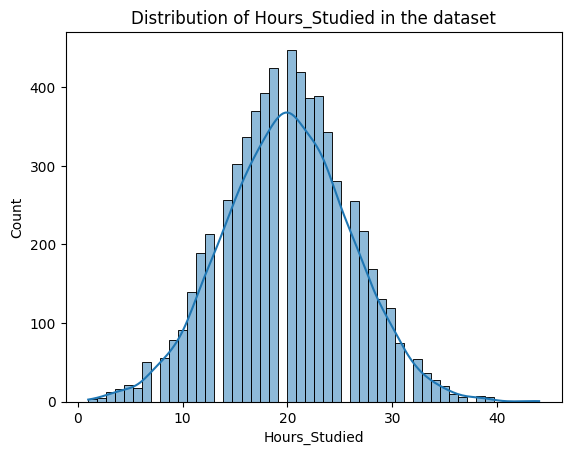


 Histogram of 'Hours_Studied' : plots the distribution of a study hour's values as a series of bars


In [ ]:
# histogram plot
sns.histplot(df['Hours_Studied'], kde=True)
plt.title('Distribution of Hours_Studied in the dataset')
plt.show()
print('\n Histogram of \'Hours_Studied\' : plots the distribution of a study hour\'s values as a series of bars')

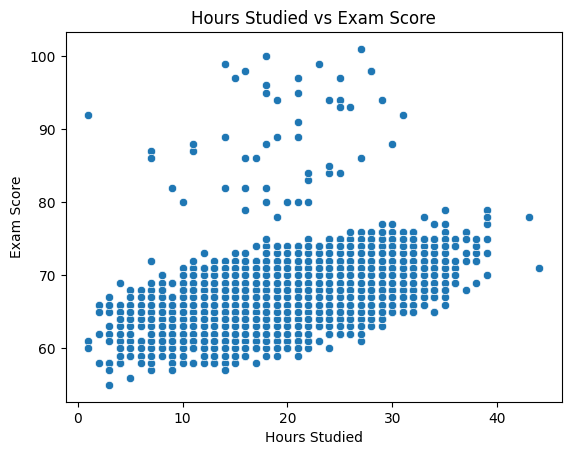


 Scatterplot of 'Hours_Studied' vs. 'Exam_Score' : plots strength, direction, and form of the relationship between two study hours and exam score


In [ ]:
# scatter plot
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title("Hours Studied vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()

print('\n Scatterplot of \'Hours_Studied\' vs. \'Exam_Score\' : plots strength, direction, and form of the relationship between two study hours and exam score')

#### Dataset Splitting

In [ ]:
X = df[['Hours_Studied']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression Model : Exam_Score prediction using only Hours_Studied - (Training, Testing, Visualization and Evaluation)

In [ ]:
# Training the Linear Regression model:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

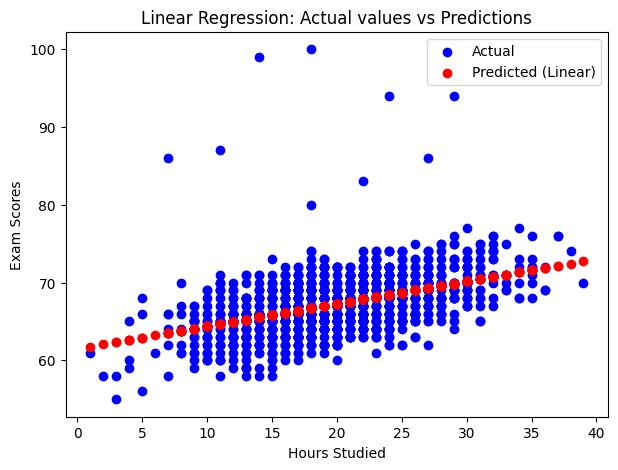

Linear Regression Performance: 
Mean Aboslute Error:  2.529242069526125
This tells us the average absolute difference between predicted and actual values.

Mean Squared Error:  12.351733799445535
This penalizes larger errors more heavily — it gives us an idea of the overall prediction error.

R² Score:  0.2051306083246669
This shows how well the model explains the variance in the data. 1.0 means perfect prediction; closer to 0 means poor.


In [ ]:
# Using the Linear Regression Model to predict for the test dataset:
y_linear = linear_model.predict(X_test)

# Visualization of the 'linear' predictions:
plt.figure(figsize=(7, 5))
plt.scatter(X_test, y_test, label ='Actual', color ='blue')
plt.scatter(X_test, y_linear, label ='Predicted (Linear)', color ='red')
plt.title('Linear Regression: Actual values vs Predictions')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Scores')
plt.legend()
plt.show()

# Evaluation of Linear Regression model :
print('Linear Regression Performance: ')
print('Mean Aboslute Error: ', mean_absolute_error(y_test, y_linear))
print("This tells us the average absolute difference between predicted and actual values.\n")
print('Mean Squared Error: ', mean_squared_error(y_test, y_linear))
print("This penalizes larger errors more heavily — it gives us an idea of the overall prediction error.\n")
print('R² Score: ', r2_score(y_test, y_linear))
print("This shows how well the model explains the variance in the data. 1.0 means perfect prediction; closer to 0 means poor.")


**Evaluation of Linear Regression:**



*   **Mean Absolute Error (2.53):**
On average, the model's predictions are off by about 2.5 points on the exam score. This is a relatively small error depending on the total score range (e.g., out of 100), and suggests reasonable prediction accuracy in practical terms.

*   **Mean Squared Error (12.35):**
The squared error penalizes large prediction mistakes more. While 12.35 is not extreme, it does indicate that some predictions may be significantly off, possibly due to outliers or unaccounted complexity in the data.

*   **R² Score (0.21):**
The model explains only about 21% of the variability in exam scores. This is relatively low, which means:The model is capturing only a small portion of the factors that affect exam scores.

---


**My Conclusion:**
While the Linear Regression model provides a decent baseline, its predictive power is limited. The low R² suggests that the relationship between features and exam scores is likely not purely linear or may involve more complex interactions. There is significant unexplained variance, likely due to other nonlinear relationships, complex interactions, or omitted features.

### **Bonus Works**

#### **1. Bonus Work - Polynomial Regression Model (Training, Testing, Visualization and Evaluation)**

In [ ]:
# making a degree 2 polynomial regression model
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())

# Training the Polynomial Regression model:
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

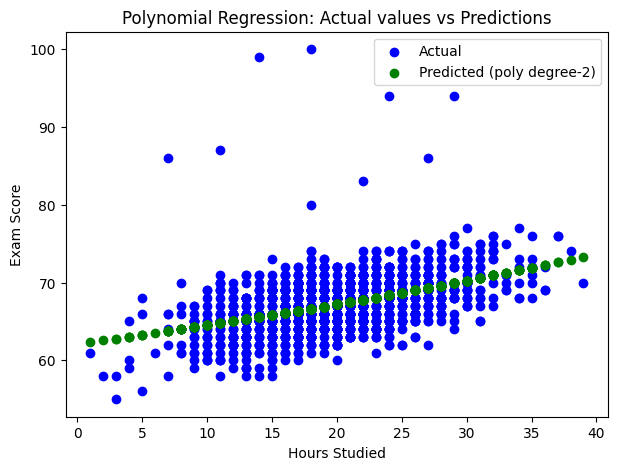

Polynomial Regression Performance: 
Mean Aboslute Error:  2.528560941765644
This tells us the average absolute difference between predicted and actual values.

Mean Squared Error:  12.352544212816404
This penalizes larger errors more heavily — it gives us an idea of the overall prediction error.

R² Score:  0.2050784559067499
This shows how well the model explains the variance in the data. 1.0 means perfect prediction; closer to 0 means poor.


In [ ]:
# Using the Polynomial Regression model to make predictions on the test dataset:
y_poly = poly_model.predict(X_test)

# Visualization of 'polynomial' prediction:
plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, label ='Actual', color ='blue')
plt.scatter(X_test, y_poly, label ='Predicted (poly degree-2)', color ='green')
plt.title('Polynomial Regression: Actual values vs Predictions')
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.show()

# Evaluation of polynomial Regression Model:
print('Polynomial Regression Performance: ')
print('Mean Aboslute Error: ', mean_absolute_error(y_test, y_poly))
print("This tells us the average absolute difference between predicted and actual values.\n")
print('Mean Squared Error: ', mean_squared_error(y_test, y_poly))
print("This penalizes larger errors more heavily — it gives us an idea of the overall prediction error.\n")
print('R² Score: ', r2_score(y_test, y_poly))
print("This shows how well the model explains the variance in the data. 1.0 means perfect prediction; closer to 0 means poor.")

**Evaluation of Polynomial Regression:**

*   **Mean Absolute Error (MAE):**
Both models have nearly identical MAE (~2.53), meaning their predictions are off by about 2.5 points on average — a small and consistent error.

*   **Mean Squared Error (MSE):**
Again, virtually identical values (~12.35), showing no improvement in handling larger errors with the polynomial model.

*   **R² Score (~0.205):**
Both models explain just over 20% of the variation in exam scores. This indicates limited explanatory power, and the polynomial model (degree 2) did not improve over the linear model in capturing relationships in the data.

---
**Conclusion:**
Despite testing a polynomial model, performance was virtually identical to the linear model. This suggests that the relationship between the chosen input feature (Hours Studied) and exam score is mostly linear — or that the model is not yet capturing more complex patterns due to limited feature context.

#### **2. Bonus Work - Linear Regression using multiple features (Training, Testing, Visualization and Evaluation)**

In [ ]:
# feature selection
features = ['Hours_Studied', 'Attendance', 'Parental_Involvement',
            'Sleep_Hours', 'Previous_Scores', 'Motivation_Level',
            'Tutoring_Sessions']

X_lin_multi = df[features]
y_lin_multi = df['Exam_Score']

# Splitting of dataset
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_lin_multi, y_lin_multi, test_size=0.2, random_state=42)

**Training :**

In [ ]:
#training the model:
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

LinearRegression()

**Testing and Evaluation**

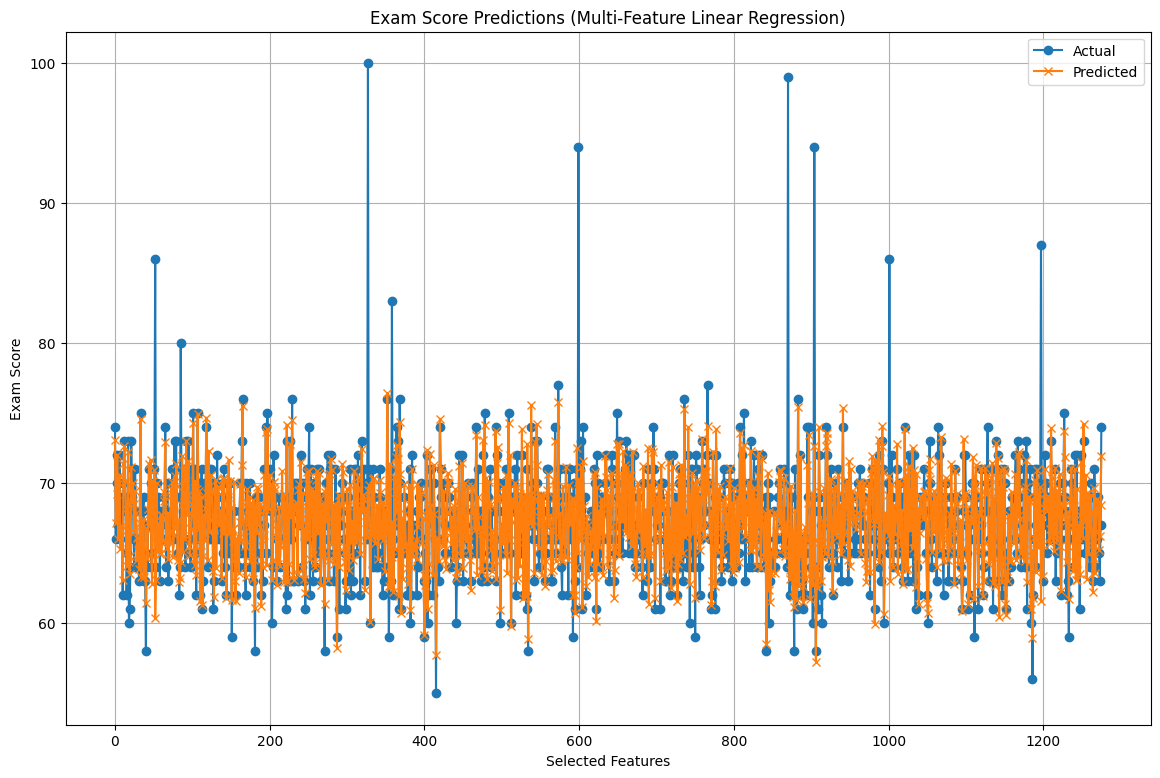

Selected Features: Hours_Studied, Attendance, Parental_Involvement, Sleep_Hours, Previous_Scores, Motivation_Level, Tutoring_Sessions

Multi-Feature Linear Regression Performance: 
Mean Aboslute Error:  1.2837653900635129
This tells us the average absolute difference between predicted and actual values.

Mean Squared Error:  5.884499656796218
This penalizes larger errors more heavily — it gives us an idea of the overall prediction error.

R² Score:  0.6213156194540653
This shows how well the model explains the variance in the data. 1.0 means perfect prediction; closer to 0 means poor.


In [ ]:
# Using the multi-feature Linear Regression model to predict for test dataset
y_pred_multi = multi_model.predict(X_test_multi)

# Visualization of the multi-feature Linear Prediction: (Line plot)
plt.figure(figsize=(14, 9))
plt.plot(y_test_multi.values, label='Actual', marker='o')
plt.plot(y_pred_multi, label='Predicted', marker='x')
plt.title('Exam Score Predictions (Multi-Feature Linear Regression)')
plt.xlabel('Selected Features')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()
print('Selected Features: Hours_Studied, Attendance, Parental_Involvement, Sleep_Hours, Previous_Scores, Motivation_Level, Tutoring_Sessions')

#Evaluation of the new model:
print('\nMulti-Feature Linear Regression Performance: ')
print('Mean Aboslute Error: ', mean_absolute_error(y_test_multi, y_pred_multi))
print("This tells us the average absolute difference between predicted and actual values.\n")
print('Mean Squared Error: ', mean_squared_error(y_test_multi, y_pred_multi))
print("This penalizes larger errors more heavily — it gives us an idea of the overall prediction error.\n")
print('R² Score: ', r2_score(y_test_multi, y_pred_multi))
print("This shows how well the model explains the variance in the data. 1.0 means perfect prediction; closer to 0 means poor.")

**Metric	Value	Interpretation**

* **Mean Absolute Error	1.28:**	On average, predictions are off by ~1.28 points, which is a small error, indicating high accuracy.
* **Mean Squared Error	5.88:**	Slightly larger errors are penalized more heavily, but the value is still low, meaning the model is consistent and not overly affected by large prediction errors.
* **R² Score	0.62:**	The model explains 62% of the variation in student exam scores — a significant improvement over the simpler models (e.g., single-feature linear regression).

**Interpretation:**
* This model performs substantially better than the single-variable (Hours_Studied) model, which had an R² of ~0.21.
* The addition of features like Previous Scores, Motivation Level, and Parental Involvement likely contributed to better predictive power, helping the model account for more factors that influence exam performance.
* A 1.28 point average error is very low and likely acceptable in real-world educational analytics.

---
**Conclusion:**
The multi-feature linear regression model is a strong baseline for predicting exam scores. It captures more complexity in student behavior and background, resulting in much better predictive accuracy compared to using a single feature.

#### **3. Bonus Work - Polynomial Regression using multiple features (Training, Testing, Visualization and Evaluation)**

In [ ]:
# Model Creation:
poly_multi_model = make_pipeline(PolynomialFeatures(8), LinearRegression())

# Model Fitting:
poly_multi_model.fit(X_train_multi, y_train_multi)

print('Model has been successfully trained to Training dataset')

Model has been successfully trained to Training dataset


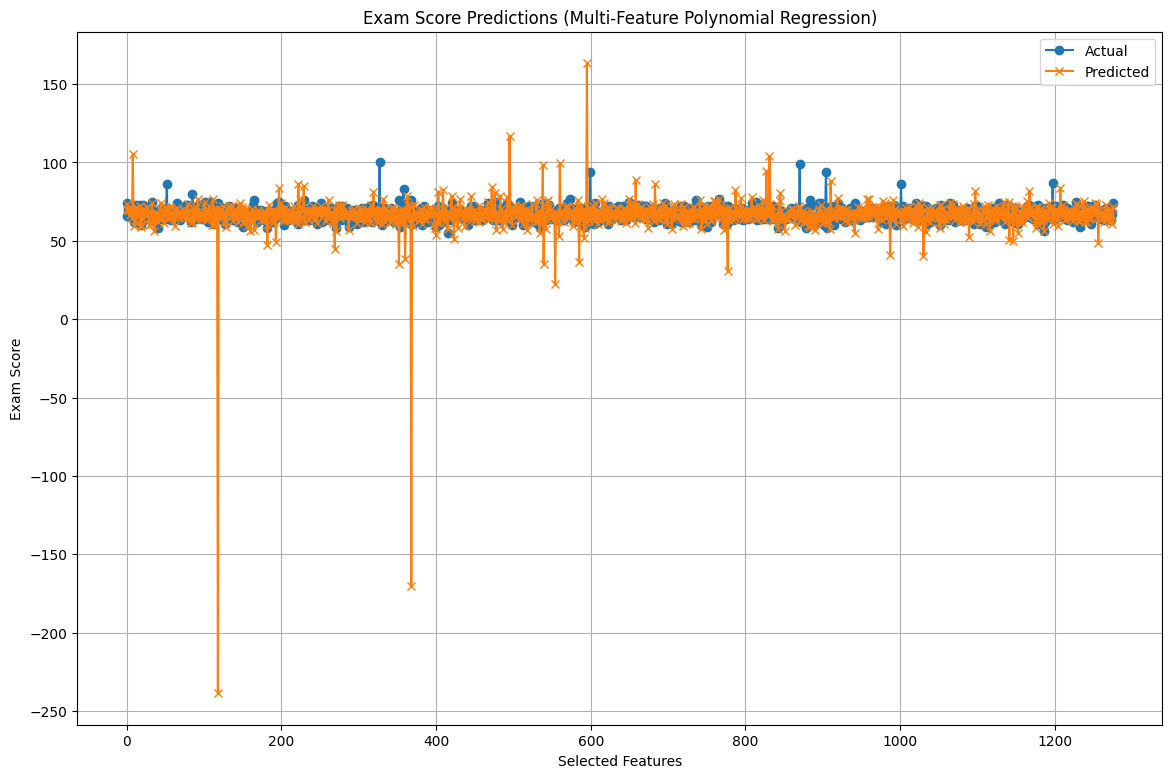

Selected Features: Hours_Studied, Attendance, Parental_Involvement, Sleep_Hours, Previous_Scores, Motivation_Level, Tutoring_Sessions

Multi-Feature Polynomial Regression Performance: 
Mean Aboslute Error:  1.2837653900635129
This tells us the average absolute difference between predicted and actual values.

Mean Squared Error:  5.884499656796218
This penalizes larger errors more heavily — it gives us an idea of the overall prediction error.

R² Score:  0.6213156194540653
This shows how well the model explains the variance in the data. 1.0 means perfect prediction; closer to 0 means poor.


In [ ]:
# Model Prediction:
y_poly_multi = poly_multi_model.predict(X_test_multi)

# Visualization of the multi-feature Linear Prediction: (Line plot)
plt.figure(figsize=(14, 9))
plt.plot(y_test_multi.values, label='Actual', marker='o')
plt.plot(y_poly_multi, label='Predicted', marker='x')
plt.title('Exam Score Predictions (Multi-Feature Polynomial Regression)')
plt.xlabel('Selected Features')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()
print('Selected Features: Hours_Studied, Attendance, Parental_Involvement, Sleep_Hours, Previous_Scores, Motivation_Level, Tutoring_Sessions')

#Evaluation of the new model:
print('\nMulti-Feature Polynomial Regression Performance: ')
print('Mean Aboslute Error: ', mean_absolute_error(y_test_multi, y_pred_multi))
print("This tells us the average absolute difference between predicted and actual values.\n")
print('Mean Squared Error: ', mean_squared_error(y_test_multi, y_pred_multi))
print("This penalizes larger errors more heavily — it gives us an idea of the overall prediction error.\n")
print('R² Score: ', r2_score(y_test_multi, y_pred_multi))
print("This shows how well the model explains the variance in the data. 1.0 means perfect prediction; closer to 0 means poor.")

**Metric	Value	Explanation:**
* **Mean Absolute Error	1.28:**	On average, predictions are off by ~1.28 points, indicating highly accurate predictions.
* **Mean Squared Error	5.88:**	Slightly larger errors are present but not extreme — the model is making consistent predictions.
* **R² Score	0.6213:**	The model explains about 62.1% of the variance in exam scores — a solid level of predictive power.

**Interpretation:**

The Polynomial Regression model achieved the same performance as the Multi-Feature Linear Regression model (identical values for all metrics).

This suggests that:
* The relationship between the selected features and exam score may already be well captured linearly, and
* Adding polynomial terms (non-linear interactions or squared features) did not meaningfully improve performance.
* In some cases, this is ideal — it implies your features are strong and the model is not underfitting or missing key patterns.

---
**Conclusion:**
The Multi-Feature Polynomial Regression model performs very well, with low error and strong explanatory power (R² = 0.62). However, its performance is no better than the linear model using the same features, which means the problem is likely well-suited to linear modeling — at least with the current feature set.